In [4]:
library(here)   # file path handline
# library(MASS)   # Modelling
library(readxl)
library(dplyr)  # piping
library(glue)
library(lmerTest)
# library(nlme)
# library(MuMIn)
library(car)
# library(ggplot2)

%%capture

prelockdownData <- read.csv(here("data", "2020-09-01", "prelockdownData.csv"))
lockdownData <- read.csv(here("data", "2020-09-01", "lockdownData.csv"))

prelockdownDataTrain <- read.csv(here("data", "2020-09-01", "prelockdownDataTrain.csv"))
prelockdownDataTest <- read.csv(here("data", "2020-09-01", "prelockdownDataTest.csv"))

prelockdownData <- prelockdownData %>% mutate_at(vars(GroupID, LocationID),
                                     funs(as.factor))
lockdownData <- lockdownData %>% mutate_at(vars(GroupID, LocationID),
                                     funs(as.factor))

prelockdownDataTrain <- prelockdownDataTrain %>% mutate_at(vars(GroupID, LocationID),
                                     funs(as.factor))
prelockdownDataTest <- prelockdownDataTest %>% mutate_at(vars(GroupID, LocationID),
                                     funs(as.factor))

SyntaxError: invalid syntax (<ipython-input-4-e5089951fdda>, line 20)

## `Pleasant` model

boundary (singular) fit: see ?isSingular


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: Pleasant_formula
   Data: prelockdownData

     AIC      BIC   logLik deviance df.resid 
   347.4    473.2   -145.7    291.4      633 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.9120 -0.5818  0.1081  0.6424  2.5363 

Random effects:
 Groups     Name                 Variance  Std.Dev. Corr                   
 LocationID (Intercept)          0.0175639 0.13253                         
            LZeq                 0.0113930 0.10674   0.18                  
            THD_95               0.0025987 0.05098   0.86  0.29            
            PeakSpectralCentroid 0.0069656 0.08346  -0.06 -0.28  0.08      
            LZeq_10_LZeq_90      0.0031260 0.05591  -0.21 -0.80 -0.52  0.39
            I                    0.0008866 0.02978  -0.29 -0.67 -0.56 -0.47
 Residual                        0.0829318 0.28798                         
      
      
      
      

Warning message:
"'r.squaredGLMM' now calculates a revised statistic. See the help page."

R2m,R2c
0.06550305,0.3565471


,(Intercept),LZeq,THD_95,PeakSpectralCentroid,LZeq_10_LZeq_90,I
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CamdenTown,-0.17680585,-0.06468630,-0.084279686,0.05853675,0.074919587,0.0153725137
EustonTap,-0.21687085,-0.12823904,-0.063061332,0.05218477,0.046004204,0.0225625849
MarchmontGarden,-0.06693256,0.10197290,-0.039919568,-0.15662502,-0.043377264,0.0216744263
MonumentoGaribaldi,0.04236716,0.03702818,0.014494740,-0.04024628,-0.023245076,-0.0007547008
PancrasLock,0.03279304,-0.05620934,0.038962275,0.05153221,-0.009750256,-0.0089140444
RegentsParkFields,0.05587881,-0.07290207,0.008028177,-0.04912060,0.017900281,0.0266267199
RegentsParkJapan,0.20575097,-0.05386460,0.060427826,0.03743872,0.026275447,-0.0043347688
RussellSq,0.11888746,0.12837885,0.056085550,0.05682222,-0.046346124,-0.0495702470
SanMarco,-0.00838270,-0.08540432,-0.004191997,0.02153289,0.031019042,0.0138156148


[1] "Predicted - Actual Correlation: 0.672457  "

[1] "Predicted - Actual Variance: 0.061786  "

[1] "Actual summary:"
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-0.853553 -0.006282  0.316942  0.268248  0.563801  1.000000 
[1] "Predicted summary:"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.5486  0.1173  0.3114  0.2682  0.4481  0.7345 


`geom_smooth()` using formula 'y ~ x'


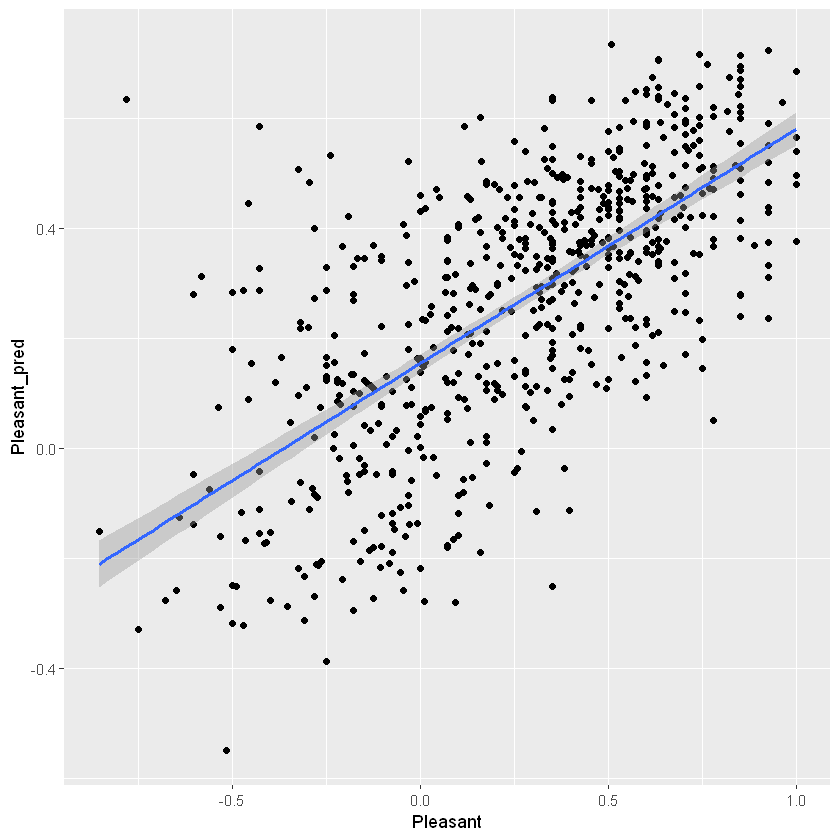

In [2]:
Pleasant_formula <- as.formula("Pleasant ~ LZeq + THD_95 + PeakSpectralCentroid + LZeq_10_LZeq_90 + I + (LZeq + THD_95 + PeakSpectralCentroid + LZeq_10_LZeq_90 + I|LocationID)")
Pleasant_model <- lmerTest::lmer(Pleasant_formula, data = prelockdownData, REML=FALSE)

summary(Pleasant_model)
r.squaredGLMM(Pleasant_model)
ranef(Pleasant_model)$LocationID

# Predicting
prelockdownData$Pleasant_pred <- predict(Pleasant_model, newdata = prelockdownData)
sprintf(fmt = "%-10s%-10f", "Predicted - Actual Correlation: ", cor(prelockdownData$Pleasant, prelockdownData$Pleasant_pred))
sprintf(fmt = "%-10s%-10f", "Predicted - Actual Variance: ", var(prelockdownData$Pleasant, prelockdownData$Pleasant_pred))

print("Actual summary:")
print(summary(prelockdownData$Pleasant))
print("Predicted summary:")
print(summary(prelockdownData$Pleasant_pred))
ggplot(prelockdownData, aes(x=Pleasant, y=Pleasant_pred)) + geom_point() +
    geom_smooth(method=lm)

## `Eventful` model

boundary (singular) fit: see ?isSingular


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: Eventful_formula
   Data: prelockdownData

     AIC      BIC   logLik deviance df.resid 
   120.6    165.5    -50.3    100.6      651 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.3597 -0.6950 -0.0020  0.6888  3.1593 

Random effects:
 Groups     Name        Variance Std.Dev. Corr       
 LocationID (Intercept) 0.002487 0.04987             
            R_50        0.018529 0.13612  -0.28      
            LAeq_Min    0.032157 0.17932   0.11 -0.99
 Residual               0.064758 0.25448             
Number of obs: 661, groups:  LocationID, 13

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)   
(Intercept)  0.12167    0.02126 4.36752   5.722  0.00352 **
R_50         0.07164    0.04771 7.82565   1.502  0.17242   
LAeq_Min     0.04077    0.05941 7.79275   0.686  0.51239   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 

R2m,R2c
0.0787795,0.2884135


,(Intercept),R_50,LAeq_Min
,<dbl>,<dbl>,<dbl>
CamdenTown,0.085230727,-0.15717298,0.16060919
EustonTap,0.005966605,0.03037632,-0.04515420
MarchmontGarden,-0.059707663,-0.04466504,0.09843143
MonumentoGaribaldi,-0.018040181,0.03395536,-0.03493227
PancrasLock,-0.021317879,0.19707785,-0.25519777
RegentsParkFields,-0.014399416,-0.10717144,0.15512594
RegentsParkJapan,-0.015937076,0.04502590,-0.05134364
RussellSq,0.008316019,0.06886286,-0.09908703
SanMarco,0.024301232,-0.15372543,0.19423428


[1] "Predicted - Actual Correlation: 0.508635  "

[1] "Predicted - Actual Variance: 0.020478  "

[1] "Actual summary:"
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.75000 -0.07322  0.11872  0.12927  0.32322  0.92678 
[1] "Predicted summary:"
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.13386  0.01443  0.12026  0.12927  0.21441  0.50657 


`geom_smooth()` using formula 'y ~ x'


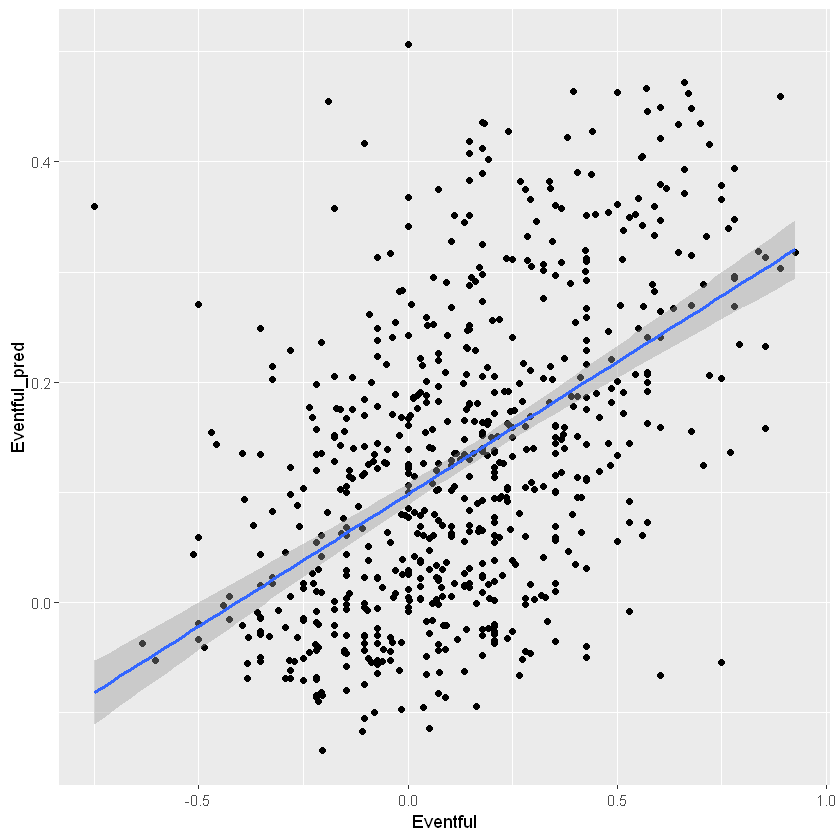

In [3]:
Eventful_formula <- as.formula("Eventful ~ R_50 + LAeq_Min + (R_50 + LAeq_Min|LocationID)")
Eventful_model <- lmerTest::lmer(Eventful_formula, data = prelockdownData, REML=FALSE)

summary(Eventful_model)
r.squaredGLMM(Eventful_model)
ranef(Eventful_model)$LocationID

# Predicting
prelockdownData$Eventful_pred <- predict(Eventful_model, newdata = prelockdownData)
sprintf(fmt = "%-10s%-10f", "Predicted - Actual Correlation: ", cor(prelockdownData$Eventful, prelockdownData$Eventful_pred))
sprintf(fmt = "%-10s%-10f", "Predicted - Actual Variance: ", var(prelockdownData$Eventful, prelockdownData$Eventful_pred))

print("Actual summary:")
print(summary(prelockdownData$Eventful))
print("Predicted summary:")
print(summary(prelockdownData$Eventful_pred))
ggplot(prelockdownData, aes(x=Eventful, y=Eventful_pred)) + geom_point() +
    geom_smooth(method=lm)

## `Natural` model

boundary (singular) fit: see ?isSingular


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: Natural_formula
   Data: prelockdownData

     AIC      BIC   logLik deviance df.resid 
  1703.0   1770.4   -836.5   1673.0      646 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.3532 -0.6507 -0.1060  0.7092  2.9182 

Random effects:
 Groups     Name        Variance Std.Dev. Corr             
 LocationID (Intercept) 0.164505 0.40559                   
            LCeq        0.002985 0.05463  -0.75            
            S_Min       0.036962 0.19226   0.98 -0.62      
            R_Min       0.022126 0.14875  -0.70  0.06 -0.82
 Residual               0.698814 0.83595                   
Number of obs: 661, groups:  LocationID, 13

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)   2.40301    0.12092   8.77456  19.873 1.34e-08 ***
LCeq         -0.26490    0.07112 132.91230  -3.725 0.000288 ***
S_Min         0.13239   

R2m,R2c
0.09744327,0.3228579


,(Intercept),LCeq,S_Min,R_Min
,<dbl>,<dbl>,<dbl>,<dbl>
CamdenTown,-0.71004844,0.070590960,-0.3324091082,0.187061110
EustonTap,-0.39144428,0.030940252,-0.1909116829,0.126578123
MarchmontGarden,0.13387111,0.004490539,0.0797596313,-0.087606502
MonumentoGaribaldi,0.10837383,-0.017105612,0.0446569666,-0.009933981
PancrasLock,0.02157491,-0.012401773,0.0002535646,0.024475560
RegentsParkFields,0.43344460,-0.068363948,0.1786554339,-0.039879520
RegentsParkJapan,0.50483796,-0.035916564,0.2500420949,-0.174967196
RussellSq,0.47640596,-0.052555327,0.2180446029,-0.110240317
SanMarco,-0.02036493,-0.017363874,-0.0281470736,0.062375415


[1] "Predicted - Actual Correlation: 0.676451  "

[1] "Predicted - Actual Variance: 0.564066  "

[1] "Actual summary:"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.500   2.500   2.516   3.333   5.000 
[1] "Predicted summary:"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.7119  1.9707  2.4136  2.5159  3.0758  4.2817 


`geom_smooth()` using formula 'y ~ x'


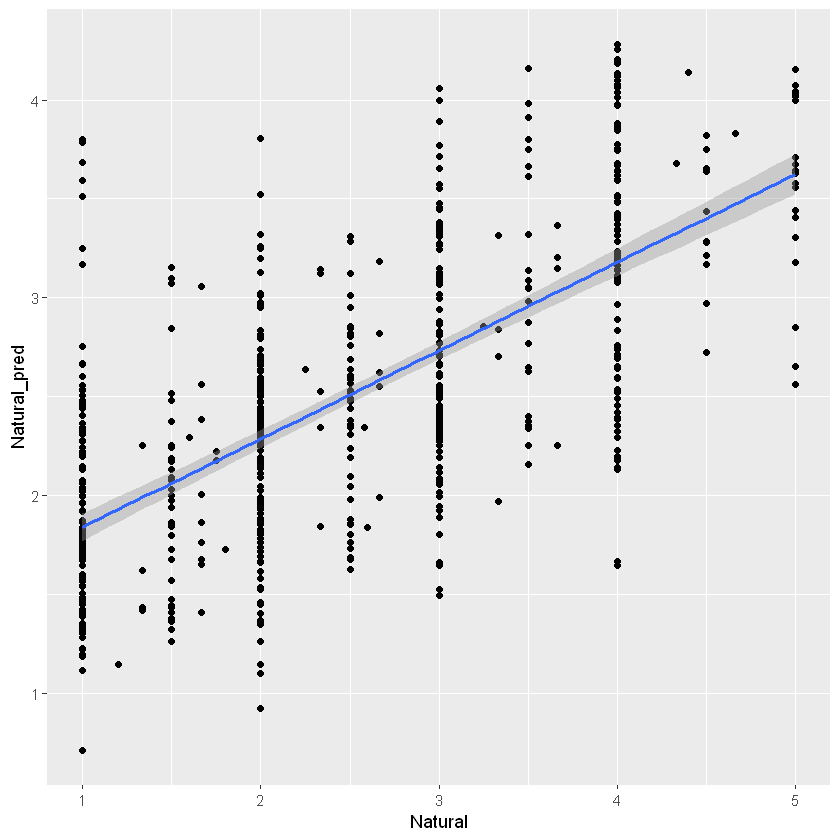

In [4]:
Natural_formula <- as.formula("Natural ~ LCeq + S_Min + R_Min + (LCeq + S_Min + R_Min|LocationID)")
Natural_model <- lmerTest::lmer(Natural_formula, data = prelockdownData, REML=FALSE)

summary(Natural_model)
r.squaredGLMM(Natural_model)
ranef(Natural_model)$LocationID

# Predicting
prelockdownData$Natural_pred <- predict(Natural_model, newdata = prelockdownData)
sprintf(fmt = "%-10s%-10f", "Predicted - Actual Correlation: ", cor(prelockdownData$Natural, prelockdownData$Natural_pred))
sprintf(fmt = "%-10s%-10f", "Predicted - Actual Variance: ", var(prelockdownData$Natural, prelockdownData$Natural_pred))

print("Actual summary:")
print(summary(prelockdownData$Natural))
print("Predicted summary:")
print(summary(prelockdownData$Natural_pred))
ggplot(prelockdownData, aes(x=Natural, y=Natural_pred)) + geom_point() +
    geom_smooth(method=lm)

# `Traffic` model

boundary (singular) fit: see ?isSingular


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: Traffic_formula
   Data: prelockdownData

     AIC      BIC   logLik deviance df.resid 
  1722.5   1924.7   -816.2   1632.5      616 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.0205 -0.6857 -0.0710  0.6349  3.3630 

Random effects:
 Groups     Name              Variance Std.Dev. Corr                         
 LocationID (Intercept)       0.400968 0.63322                               
            THD_50            0.015783 0.12563  -0.62                        
            I_Min             0.012228 0.11058  -0.02  0.27                  
            R_5               0.008267 0.09093   0.18 -0.85 -0.12            
            LZeq_Max_LZeq_Min 0.018176 0.13482  -0.67 -0.14 -0.40  0.53      
            T_90              0.008755 0.09357   0.30  0.39  0.80 -0.49 -0.81
            SIL_5_SIL_95      0.010755 0.10371   0.70 -0.56 -0.54  0.09 -0.33
            

R2m,R2c
0.05053448,0.4568795


,(Intercept),THD_50,I_Min,R_5,LZeq_Max_LZeq_Min,T_90,SIL_5_SIL_95,S_10
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CamdenTown,0.91902838,0.039398775,0.146066400,-0.0881163176,-0.29519014,0.1989095803,0.022866885,0.024885522
EustonTap,1.10381263,-0.182763652,-0.001118931,0.0729994092,-0.11655201,0.0268006059,0.125720313,-0.090503621
MarchmontGarden,-0.17934846,0.120721672,-0.075560095,-0.1148141422,-0.04631775,-0.0020889729,0.030597779,0.044219587
MonumentoGaribaldi,-0.73808491,0.070228780,0.001066830,-0.0003343765,0.12269383,-0.0437497826,-0.084425901,0.038923350
PancrasLock,-0.32076463,0.041615748,0.045516576,-0.0056154771,0.02839442,0.0089354946,-0.050296341,0.030906255
RegentsParkFields,-0.21021303,-0.005011628,0.034693726,0.0425458305,0.06445085,0.0009085827,-0.077976863,-0.003712346
RegentsParkJapan,-0.68265911,0.075112250,0.113293933,0.0114979926,0.07793390,0.0255899821,-0.137467528,0.056840821
RussellSq,0.25281181,-0.153447843,-0.190894271,0.0903479297,0.12230365,-0.1499291672,0.113160316,-0.099657789
SanMarco,-0.97184361,0.147917928,-0.007133939,-0.0528085960,0.11688970,-0.0340011215,-0.108932313,0.072410475


[1] "Predicted - Actual Correlation: 0.659057  "

[1] "Predicted - Actual Variance: 0.434453  "

[1] "Actual summary:"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   2.715   3.500   5.000 
[1] "Predicted summary:"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.135   2.375   2.621   2.715   3.000   5.047 


`geom_smooth()` using formula 'y ~ x'


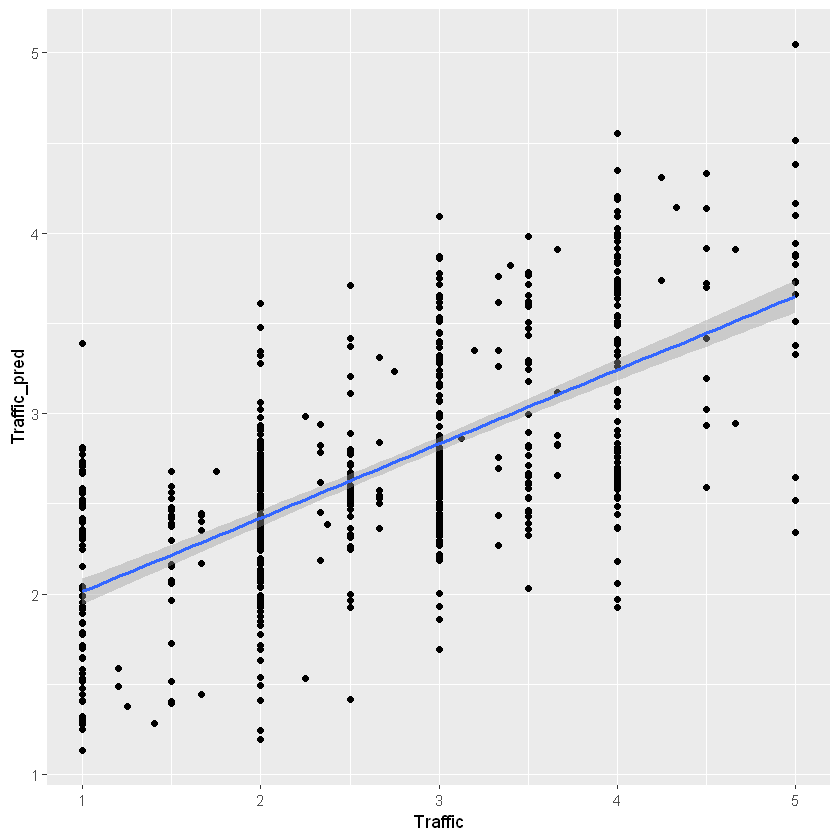

In [5]:
Traffic_formula <- as.formula("Traffic ~ THD_50 + I_Min + R_5 + LZeq_Max_LZeq_Min + T_90 + SIL_5_SIL_95 + S_10 + (THD_50 + I_Min + R_5 + LZeq_Max_LZeq_Min + T_90 + SIL_5_SIL_95 + S_10 |LocationID)")
Traffic_model <- lmerTest::lmer(Traffic_formula, data = prelockdownData, REML=FALSE)

summary(Traffic_model)
r.squaredGLMM(Traffic_model)
ranef(Traffic_model)$LocationID

# Predicting
prelockdownData$Traffic_pred <- predict(Traffic_model, newdata = prelockdownData)
sprintf(fmt = "%-10s%-10f", "Predicted - Actual Correlation: ", cor(prelockdownData$Traffic, prelockdownData$Traffic_pred))
sprintf(fmt = "%-10s%-10f", "Predicted - Actual Variance: ", var(prelockdownData$Traffic, prelockdownData$Traffic_pred))

print("Actual summary:")
print(summary(prelockdownData$Traffic))
print("Predicted summary:")
print(summary(prelockdownData$Traffic_pred))
ggplot(prelockdownData, aes(x=Traffic, y=Traffic_pred)) + geom_point() +
    geom_smooth(method=lm)

# `Human` model

boundary (singular) fit: see ?isSingular


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: Human_formula
   Data: prelockdownData

     AIC      BIC   logLik deviance df.resid 
  1609.5   1960.0   -726.7   1453.5      583 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.7839 -0.6143  0.0044  0.7265  3.1967 

Random effects:
 Groups     Name            Variance Std.Dev. Corr                         
 LocationID (Intercept)     0.10712  0.3273                                
            FS_Min          0.02427  0.1558   -0.28                        
            I_10_I_90       0.03461  0.1860   -0.66  0.17                  
            N_5             0.15008  0.3874   -0.60 -0.02  0.01            
            T_5             0.01515  0.1231    0.03 -0.32 -0.11 -0.36      
            R_5             0.03043  0.1744    0.77 -0.65 -0.47 -0.65  0.50
            FS              0.01715  0.1310   -0.28  0.23 -0.45  0.82 -0.32
            I_Max_I_Min     0.

R2m,R2c
0.07558822,0.4172531


,(Intercept),FS_Min,I_10_I_90,N_5,T_5,R_5,FS,I_Max_I_Min,SIL_Max_SIL_Min,THD_10_THD_90,S_5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CamdenTown,0.19378845,-0.0483678431,-0.125384795,-0.19708156,0.0703176805,0.14300930,-0.01704550,-0.06536135,0.08484730,-0.06545180,0.01226140
EustonTap,-0.16155383,0.1549856715,0.220447941,-0.37298118,0.0819852136,-0.07542360,-0.14506426,-0.10952226,-0.02924549,0.04592843,0.06750983
MarchmontGarden,-0.21403520,0.2160513650,-0.097392985,0.47381235,-0.0828264948,-0.25960176,0.22573508,0.27512692,-0.42051404,-0.08211510,-0.07729962
MonumentoGaribaldi,0.17972876,-0.1902731880,-0.079396794,-0.29398991,0.1728653058,0.25629642,-0.09809614,-0.17187145,0.27260881,-0.07912349,-0.04184254
PancrasLock,-0.57729537,0.0571821549,0.127496865,0.58605755,-0.0266921608,-0.24010165,0.14548212,0.04276944,-0.12641819,-0.06106308,-0.19690494
RegentsParkFields,-0.29204834,0.1978416829,0.273736421,-0.19822548,-0.0689557366,-0.15655167,-0.09154730,-0.18504576,0.01165258,0.09852266,0.09774438
RegentsParkJapan,-0.31520574,-0.1312753122,0.182961576,0.22625086,0.0110776822,-0.03076507,-0.03346932,-0.10793625,0.17780128,0.03544426,-0.11036823
RussellSq,-0.02568726,-0.1082837586,-0.001187759,-0.06215828,0.1223642824,0.09778495,-0.04344470,-0.07215921,0.12224003,-0.05742682,-0.07669915
SanMarco,0.09573132,-0.0007064427,-0.272437150,0.36167556,0.0003748802,-0.01653707,0.19908596,0.23536408,-0.22034104,-0.13626878,-0.10280702


[1] "Predicted - Actual Correlation: 0.646373  "

[1] "Predicted - Actual Variance: 0.283634  "

[1] "Actual summary:"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.500   3.000   3.065   4.000   5.000 
[1] "Predicted summary:"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.168   2.676   3.075   3.065   3.371   4.691 


`geom_smooth()` using formula 'y ~ x'


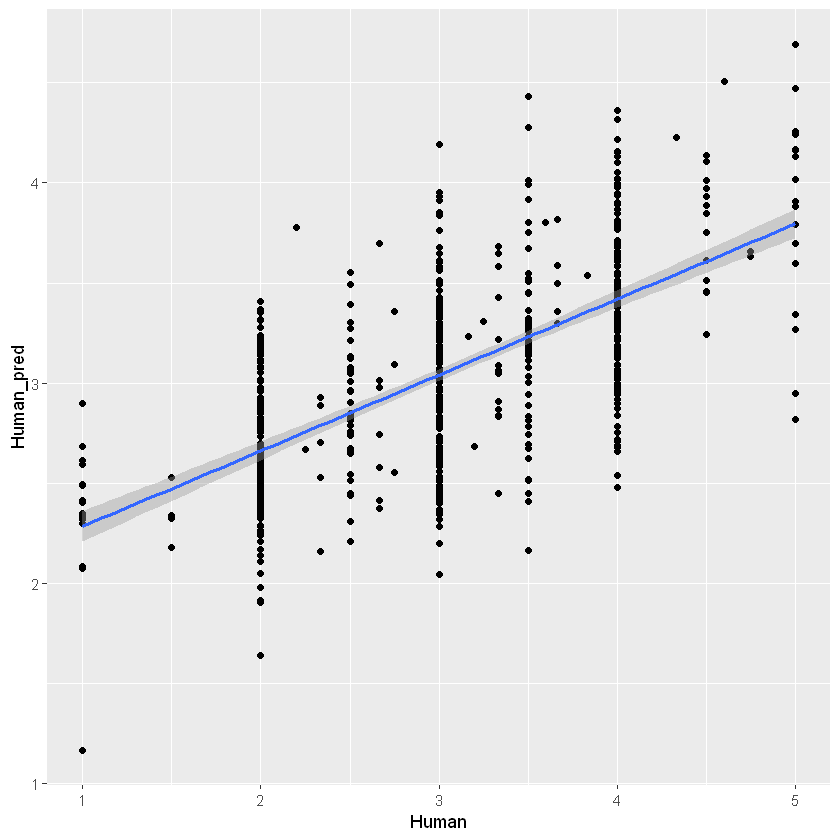

In [6]:
Human_formula <- as.formula("Human ~ FS_Min + I_10_I_90 + N_5 + T_5 + R_5 + FS + I_Max_I_Min + SIL_Max_SIL_Min + THD_10_THD_90 + S_5 + (FS_Min + I_10_I_90 + N_5 + T_5 + R_5 + FS + I_Max_I_Min + SIL_Max_SIL_Min + THD_10_THD_90 + S_5|LocationID)")
Human_model <- lmerTest::lmer(Human_formula, data = prelockdownData, REML=FALSE)

summary(Human_model)
r.squaredGLMM(Human_model)
ranef(Human_model)$LocationID

# Predicting
prelockdownData$Human_pred <- predict(Human_model, newdata = prelockdownData)
sprintf(fmt = "%-10s%-10f", "Predicted - Actual Correlation: ", cor(prelockdownData$Human, prelockdownData$Human_pred))
sprintf(fmt = "%-10s%-10f", "Predicted - Actual Variance: ", var(prelockdownData$Human, prelockdownData$Human_pred))

print("Actual summary:")
print(summary(prelockdownData$Human))
print("Predicted summary:")
print(summary(prelockdownData$Human_pred))
ggplot(prelockdownData, aes(x=Human, y=Human_pred)) + geom_point() +
    geom_smooth(method=lm)

# `Other` model

boundary (singular) fit: see ?isSingular


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: Other_formula
   Data: prelockdownData

     AIC      BIC   logLik deviance df.resid 
  1816.8   1884.2   -893.4   1786.8      646 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.2482 -0.7679 -0.1019  0.7158  3.6724 

Random effects:
 Groups     Name             Variance Std.Dev. Corr             
 LocationID (Intercept)      0.17044  0.4128                    
            SpectralCentroid 0.12889  0.3590   -0.52            
            S_10             0.04741  0.2177    0.60 -1.00      
            THD_10           0.03781  0.1945   -0.83  0.91 -0.94
 Residual                    0.82283  0.9071                    
Number of obs: 661, groups:  LocationID, 13

Fixed effects:
                 Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)       2.44421    0.13393 12.08099  18.250 3.67e-10 ***
SpectralCentroid -0.38381    0.14636 12.15892  -2.622 

R2m,R2c
0.04268018,0.2269755


,(Intercept),SpectralCentroid,S_10,THD_10
,<dbl>,<dbl>,<dbl>,<dbl>
CamdenTown,0.33359078,-0.18150921,0.121527954,-0.140250801
EustonTap,0.55614633,-0.09441018,0.083447103,-0.159082827
MarchmontGarden,-0.13762933,-0.11756918,0.060011635,-0.011223427
MonumentoGaribaldi,0.06549582,-0.24661519,0.144612824,-0.103272590
PancrasLock,0.50297563,-0.30473000,0.201010746,-0.222613708
RegentsParkFields,-0.49320408,0.52372702,-0.325835911,0.299028889
RegentsParkJapan,-0.74546339,0.27109285,-0.194582677,0.265124161
RussellSq,0.02182582,-0.26201570,0.151117741,-0.098970645
SanMarco,-0.07054016,-0.06617763,0.034145935,-0.007877224


[1] "Predicted - Actual Correlation: 0.482504  "

[1] "Predicted - Actual Variance: 0.217905  "

[1] "Actual summary:"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.500   2.000   2.303   3.000   5.000 
[1] "Predicted summary:"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.069   1.972   2.281   2.303   2.681   3.754 


`geom_smooth()` using formula 'y ~ x'


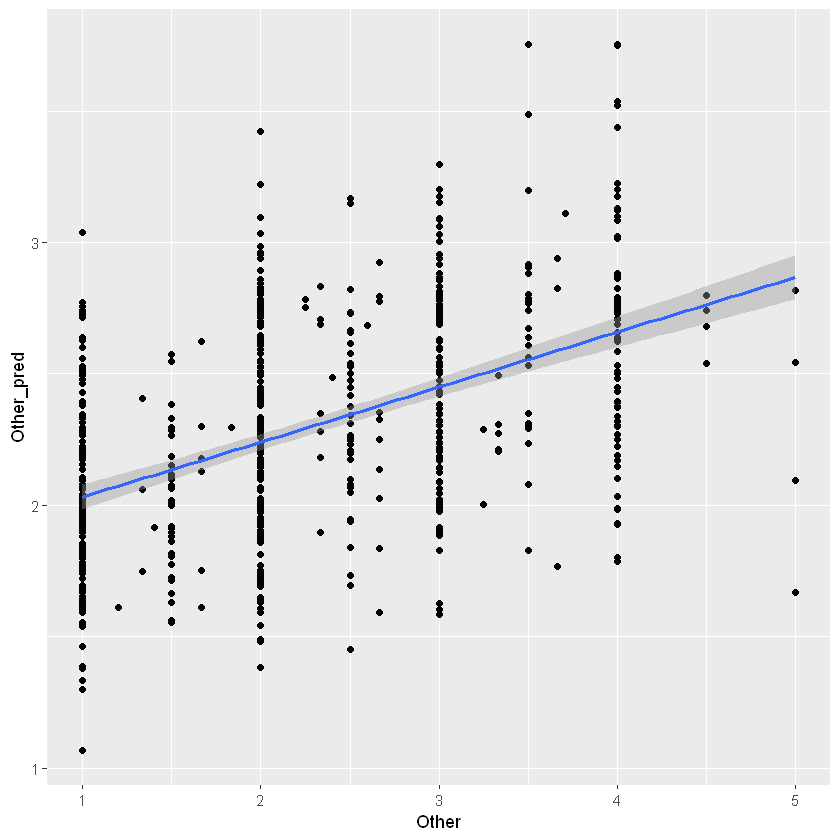

In [7]:
Other_formula <- as.formula("Other ~ SpectralCentroid + S_10 + THD_10 + (SpectralCentroid + S_10 + THD_10|LocationID)")
Other_model <- lmerTest::lmer(Other_formula, data = prelockdownData, REML=FALSE)

summary(Other_model)
r.squaredGLMM(Other_model)
ranef(Other_model)$LocationID

# Predicting
prelockdownData$Other_pred <- predict(Other_model, newdata = prelockdownData)
sprintf(fmt = "%-10s%-10f", "Predicted - Actual Correlation: ", cor(prelockdownData$Other, prelockdownData$Other_pred))
sprintf(fmt = "%-10s%-10f", "Predicted - Actual Variance: ", var(prelockdownData$Other, prelockdownData$Other_pred))

print("Actual summary:")
print(summary(prelockdownData$Other))
print("Predicted summary:")
print(summary(prelockdownData$Other_pred))
ggplot(prelockdownData, aes(x=Other, y=Other_pred)) + geom_point() +
    geom_smooth(method=lm)

# `overall` model

boundary (singular) fit: see ?isSingular


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: overall_formula
   Data: prelockdownData

     AIC      BIC   logLik deviance df.resid 
  1535.7   1661.5   -739.8   1479.7      633 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.7709 -0.6385  0.1063  0.6330  2.2358 

Random effects:
 Groups     Name          Variance Std.Dev. Corr                         
 LocationID (Intercept)   0.112822 0.33589                               
            LCeq          0.049161 0.22172   0.53                        
            THD_95        0.024929 0.15789   0.29  0.59                  
            R_Min         0.060275 0.24551  -0.86 -0.46  0.16            
            FS_Max_FS_Min 0.001833 0.04282  -0.47 -0.61 -0.98  0.01      
            I_5_I_95      0.006299 0.07937  -0.31 -0.58 -1.00 -0.15  0.98
 Residual                 0.505256 0.71081                               
Number of obs: 661, groups:  LocationID, 13


R2m,R2c
0.05039524,0.3307387


,(Intercept),LCeq,THD_95,R_Min,FS_Max_FS_Min,I_5_I_95
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CamdenTown,-0.08901736,-0.25268113,-0.325072531,-0.15759296,0.0830329541,0.162496615
EustonTap,-0.66489153,-0.34990584,-0.090227449,0.46776316,0.0378837752,0.047018848
MarchmontGarden,-0.11620098,0.11314882,-0.034601771,-0.01140297,0.0147935067,0.020397651
MonumentoGaribaldi,0.09545395,-0.02847528,-0.058461340,-0.10381367,0.0117573982,0.028416948
PancrasLock,0.05138367,0.02730957,0.187565122,0.14162951,-0.0501200102,-0.095525278
RegentsParkFields,0.30507655,-0.07738553,-0.043191928,-0.19611800,0.0002878209,0.017925907
RegentsParkJapan,0.59427515,0.17721181,0.053469731,-0.38684454,-0.0292858219,-0.030216328
RussellSq,0.16928845,0.29541964,0.201464157,-0.03158264,-0.0524457785,-0.099723792
SanMarco,-0.08308178,-0.09432899,-0.007872164,0.08346050,0.0029008016,0.003389990


[1] "Predicted - Actual Correlation: 0.646975  "

[1] "Predicted - Actual Variance: 0.331279  "

[1] "Actual summary:"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   3.000   4.000   3.657   4.000   5.000 
[1] "Predicted summary:"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.381   3.372   3.697   3.657   3.997   4.840 


`geom_smooth()` using formula 'y ~ x'


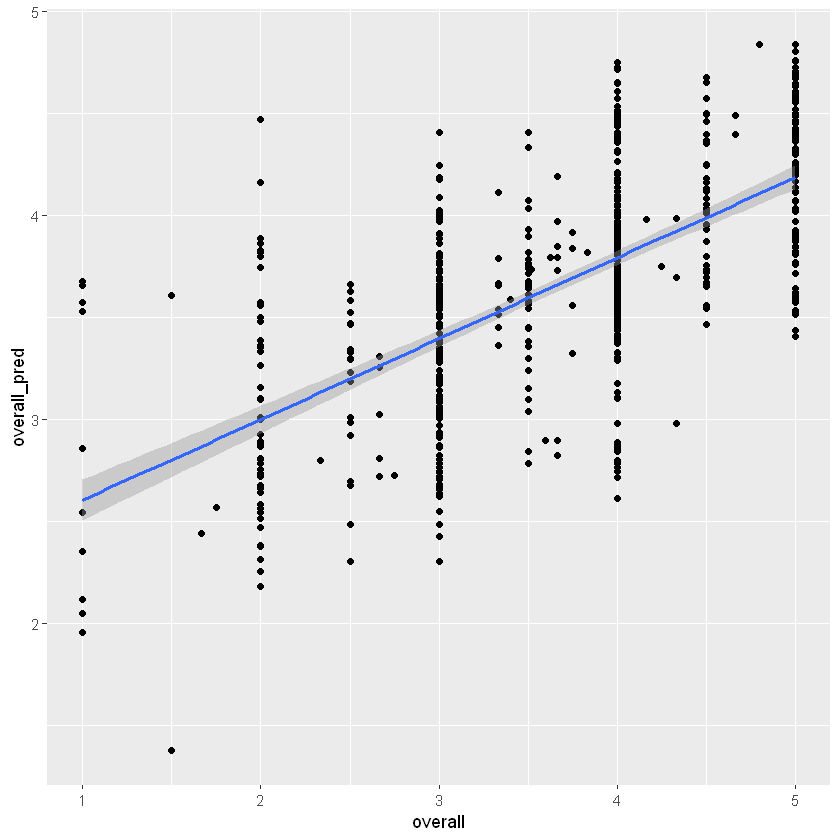

In [8]:
overall_formula <- as.formula("overall ~ LCeq + THD_95 + R_Min + FS_Max_FS_Min + I_5_I_95 + (LCeq + THD_95 + R_Min + FS_Max_FS_Min + I_5_I_95 |LocationID)")
overall_model <- lmerTest::lmer(overall_formula, data = prelockdownData, REML=FALSE)

summary(overall_model)
r.squaredGLMM(overall_model)
ranef(overall_model)$LocationID

# Predicting
prelockdownData$overall_pred <- predict(overall_model, newdata = prelockdownData)
sprintf(fmt = "%-10s%-10f", "Predicted - Actual Correlation: ", cor(prelockdownData$overall, prelockdownData$overall_pred))
sprintf(fmt = "%-10s%-10f", "Predicted - Actual Variance: ", var(prelockdownData$overall, prelockdownData$overall_pred))

print("Actual summary:")
print(summary(prelockdownData$overall))
print("Predicted summary:")
print(summary(prelockdownData$overall_pred))
ggplot(prelockdownData, aes(x=overall, y=overall_pred)) + geom_point() +
    geom_smooth(method=lm)

# `loudness` model

boundary (singular) fit: see ?isSingular


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: loudness_formula
   Data: prelockdownData

     AIC      BIC   logLik deviance df.resid 
  1371.6   1439.0   -670.8   1341.6      646 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.92577 -0.52942  0.02101  0.56026  3.13486 

Random effects:
 Groups     Name        Variance  Std.Dev. Corr             
 LocationID (Intercept) 0.0005779 0.02404                   
            R_95        0.2819784 0.53102  -1.00            
            LCeq_50     0.0943866 0.30722   1.00 -1.00      
            S           0.0002635 0.01623  -1.00  1.00 -1.00
 Residual               0.4309371 0.65646                   
Number of obs: 661, groups:  LocationID, 13

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)   2.89613    0.03592  32.73455  80.637  < 2e-16 ***
R_95          0.19989    0.16726  11.03814   1.195 0.257114    
LCeq_50

R2m,R2c
0.2080431,0.2875252


,(Intercept),R_95,LCeq_50,S
,<dbl>,<dbl>,<dbl>,<dbl>
CamdenTown,0.022087105,-0.4878676,0.2822635,-0.014914016
EustonTap,0.036927287,-0.8156949,0.4719245,-0.024936126
MarchmontGarden,-0.010621823,0.2346266,-0.1357447,0.007172613
MonumentoGaribaldi,-0.010300040,0.2275186,-0.1316324,0.006955317
PancrasLock,0.009500273,-0.2098528,0.1214116,-0.006415272
RegentsParkFields,-0.038722455,0.8553423,-0.4948644,0.026148064
RegentsParkJapan,-0.008684247,0.1918234,-0.1109817,0.005864047
RussellSq,-0.016410864,0.3624967,-0.2097260,0.011081571
SanMarco,0.006438018,-0.1422089,0.0822762,-0.004347356


[1] "Predicted - Actual Correlation: 0.515952  "

[1] "Predicted - Actual Variance: 0.147075  "

[1] "Actual summary:"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.500   3.000   2.938   3.333   5.000 
[1] "Predicted summary:"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.010   2.689   2.942   2.938   3.185   4.707 


`geom_smooth()` using formula 'y ~ x'


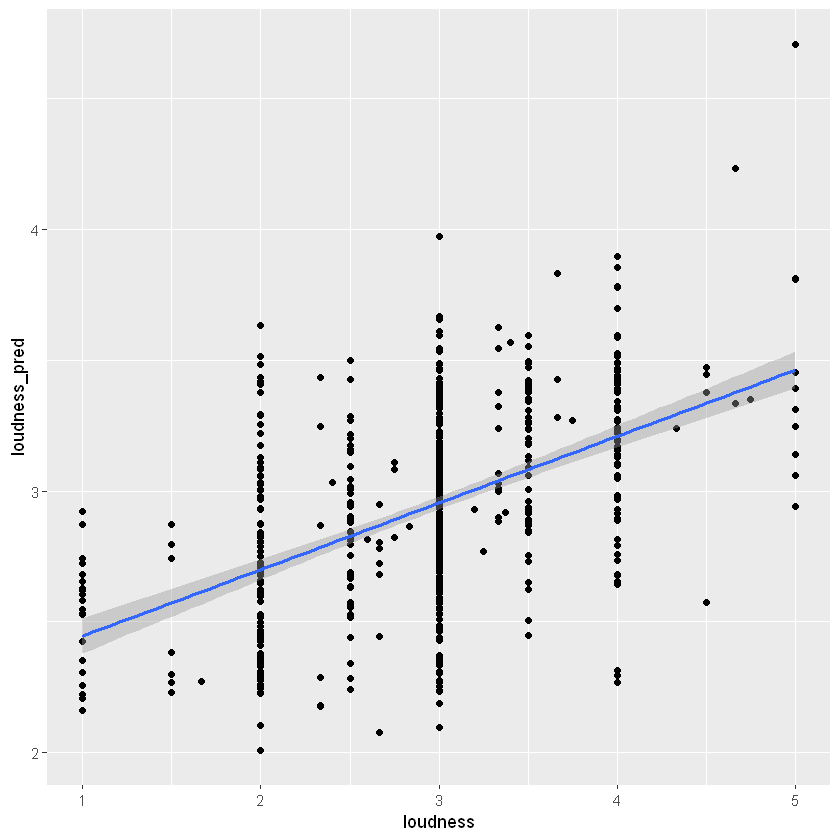

In [9]:
loudness_formula <- as.formula("loudness ~ R_95 + LCeq_50 + S + (R_95 + LCeq_50 + S|LocationID)")
loudness_model <- lmerTest::lmer(loudness_formula, data = prelockdownData, REML=FALSE)

summary(loudness_model)
r.squaredGLMM(loudness_model)
ranef(loudness_model)$LocationID

# Predicting
prelockdownData$loudness_pred <- predict(loudness_model, newdata = prelockdownData)
sprintf(fmt = "%-10s%-10f", "Predicted - Actual Correlation: ", cor(prelockdownData$loudness, prelockdownData$loudness_pred))
sprintf(fmt = "%-10s%-10f", "Predicted - Actual Variance: ", var(prelockdownData$loudness, prelockdownData$loudness_pred))

print("Actual summary:")
print(summary(prelockdownData$loudness))
print("Predicted summary:")
print(summary(prelockdownData$loudness_pred))
ggplot(prelockdownData, aes(x=loudness, y=loudness_pred)) + geom_point() +
    geom_smooth(method=lm)

# Predicting for during Lockdown data

In [11]:
lockdownData$Pleasant_pred <- predict(Pleasant_model, newdata = lockdownData)
lockdownData$Eventful_pred <- predict(Eventful_model, newdata = lockdownData)
lockdownData$Natural_pred <- predict(Natural_model, newdata = lockdownData)
lockdownData$Traffic_pred <- predict(Traffic_model, newdata = lockdownData)
lockdownData$Human_pred <- predict(Human_model, newdata = lockdownData)
lockdownData$Other_pred <- predict(Other_model, newdata = lockdownData)
lockdownData$overall_pred <- predict(overall_model, newdata = lockdownData)
lockdownData$loudness_pred <- predict(loudness_model, newdata = lockdownData)

write.csv(lockdownData, here("results", "2020-09-08", "lockdownData-R-Predict_3.csv"), row.names = FALSE)
write.csv(prelockdownData, here("results", "2020-09-08", "prelockdownData-R-Predict_3.csv"), row.names = FALSE)